In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## statsmodels의 Logit을 이용한 로지스틱 회귀분석

- https://www.statsmodels.org/stable/api.html#generalized-linear-models

### 예제데이터 : titanic datasets

#### 데이터 로드

In [2]:
titan = sns.load_dataset('titanic')
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


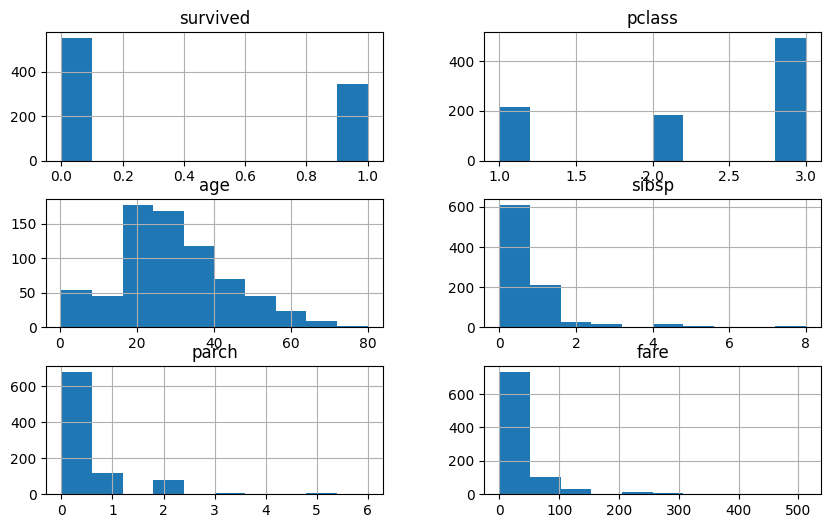

In [4]:
titan.hist(figsize=(10,6))
plt.show()

#### 분석 데이터 추출

In [5]:
titan.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
df = titan[['survived', 'pclass','sex', 'age', 'sibsp', 'parch', 'fare',
      ]]

#### EDA & 전처리

In [9]:
df[['age','fare']].skew()

age     0.389108
fare    4.787317
dtype: float64

In [10]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [19]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   fare      714 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


#### 왜도

In [20]:
df_ohe = pd.get_dummies(df, columns=['pclass','sex'], drop_first=True, dtype='int')
df_ohe

,survived,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male
0,0,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0
886,0,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,0
889,1,26.0,0,0,30.0000,0,0,1


#### 데이터 전처리 : 결측치 처리

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
ftr_names = df_ohe.columns.difference(['survived'])
X = df_ohe[ftr_names]
y = df_ohe['survived']
X_ = sm.add_constant(X, has_constant='add')

In [23]:
model = sm.Logit(y, X_)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.445221
         Iterations 6


#### 원핫인코딩

In [24]:
result.params

const       4.179995
age        -0.044159
fare        0.002043
parch      -0.061268
pclass_2   -1.292538
pclass_3   -2.501069
sex_male   -2.637451
sibsp      -0.376847
dtype: float64

In [25]:
result.conf_int()

,0,1
const,3.193310,5.166680
age,-0.060356,-0.027961
fare,-0.002981,0.007068
parch,-0.302202,0.179665
pclass_2,-1.923167,-0.661908
pclass_3,-3.164995,-1.837143
sex_male,-3.068795,-2.206108
sibsp,-0.626708,-0.126985


### sm.Logit()으로 로지스틱 회귀분석

In [26]:
df_ohe.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'pclass_2', 'pclass_3',
       'sex_male'],
      dtype='object')

#### 상수항 추가

In [29]:
means = df_ohe.mean()
means

survived     0.406162
age         29.699118
sibsp        0.512605
parch        0.431373
fare        34.694514
pclass_2     0.242297
pclass_3     0.497199
sex_male     0.634454
dtype: float64

In [31]:
ages = [5,10,30,50,60]
pred_df  =pd.DataFrame({'age':ages,
              'sibsp' : means.sibsp,
             'parch' : means.parch,
              'fare' : means.fare,
              'pclass_2' : means.pclass_2,
              'pcalss_3' : means.pclass_3,
              'sex_male' : means.sex_male,
              'const' : result.params.const})

In [33]:
pred_df['predict'] = result.predict(pred_df)
pred_df

,age,sibsp,parch,fare,pclass_2,pcalss_3,sex_male,const,predict
0,5,0.512605,0.431373,34.694514,0.242297,0.497199,0.634454,4.179995,0.999999
1,10,0.512605,0.431373,34.694514,0.242297,0.497199,0.634454,4.179995,1.000000
2,30,0.512605,0.431373,34.694514,0.242297,0.497199,0.634454,4.179995,1.000000
3,50,0.512605,0.431373,34.694514,0.242297,0.497199,0.634454,4.179995,1.000000
4,60,0.512605,0.431373,34.694514,0.242297,0.497199,0.634454,4.179995,1.000000


#### 로지스틱 회귀모형 생성

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
import sys
sys.path.append('mymodule')
from mymodule.evals import print_eval_score

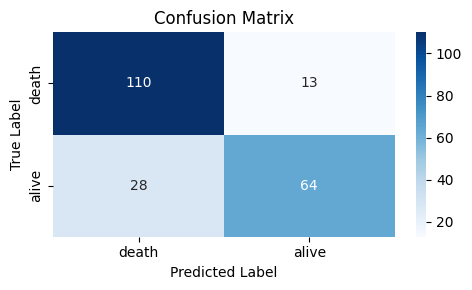

accuracy:0.8093 recall: 0.6957 precision:0.8312 f1:0.7574 g-measure:0.7604 AUC: 0.8826

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       123
           1       0.83      0.70      0.76        92

    accuracy                           0.81       215
   macro avg       0.81      0.79      0.80       215
weighted avg       0.81      0.81      0.81       215



(0.8093023255813954,
 0.8311688311688312,
 0.6956521739130435,
 0.757396449704142,
 np.float64(0.7603975304348121))

In [42]:
X = df_ohe[ftr_names]
y = df_ohe['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

print_eval_score(y_test, pred, pred_proba, target_names=['death','alive'])

#### 회귀모형 적합 결과

In [43]:
from sklearn.model_selection import GridSearchCV

In [45]:
lr_clf = LogisticRegression()

In [47]:
params = {'penalty' : ['l2','l1','elasticnet'],
         'C' : [0.01, 0.1, 1, 5 ,10]}
grid = GridSearchCV(lr_clf, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l2', 'l1', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [49]:
result_df = pd.DataFrame(grid.cv_results_)
result_df[['param_C','param_penalty','params','mean_test_score','rank_test_score']]

,param_C,param_penalty,params,mean_test_score,rank_test_score
0,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.717394,5
1,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,6
2,0.01,elasticnet,"{'C': 0.01, 'penalty': 'elasticnet'}",NaN,6
3,0.10,l2,"{'C': 0.1, 'penalty': 'l2'}",0.791636,4
4,0.10,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,6
5,0.10,elasticnet,"{'C': 0.1, 'penalty': 'elasticnet'}",NaN,6
6,1.00,l2,"{'C': 1, 'penalty': 'l2'}",0.803677,3
7,1.00,l1,"{'C': 1, 'penalty': 'l1'}",NaN,6
8,1.00,elasticnet,"{'C': 1, 'penalty': 'elasticnet'}",NaN,6
9,5.00,l2,"{'C': 5, 'penalty': 'l2'}",0.803677,2


In [51]:
print(f'최적의 하이퍼파라미터: {grid.best_params_}')
print(f'최적 평균정확도 : {grid.best_score_:.5f}')

최적의 하이퍼파라미터: {'C': 10, 'penalty': 'l2'}
최적 평균정확도 : 0.80768


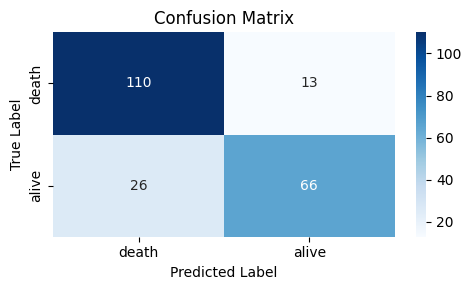

accuracy:0.8186 recall: 0.7174 precision:0.8354 f1:0.7719 g-measure:0.7742 AUC: 0.8814

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.84      0.72      0.77        92

    accuracy                           0.82       215
   macro avg       0.82      0.81      0.81       215
weighted avg       0.82      0.82      0.82       215



(0.8186046511627907,
 0.8354430379746836,
 0.717391304347826,
 0.7719298245614035,
 np.float64(0.7741702466001704))

In [56]:
best_model = grid.best_estimator_
pred_best = best_model.predict(X_test)
pred_proba_best = best_model.predict_proba(X_test)[:,1]
print_eval_score(y_test, pred_best, pred_proba_best,target_names=['death','alive'])

- 추정된 로지스틱 회귀식

$$ logit(X) = age + fare + parch + ... +sibsp $$

- Logit함수의 계수 추정값

- Logit함수의 계수값에 대한 신뢰구간 (2.5%, 97.5%)

- Odds :  exp(Logit)

#### 로지스틱 회귀분석 결과 해석 : Logit와 Odds

- age는 값이 높아질수록 생존확률은 낮아짐
    - Logit : age가 1살이 증가할 때 생존일 Logit이 -0.0442 단위 증가
    - Odds : age가 1살이 증가할 때 생존할 확률이 0.9568배($ e^{-0.0442} $) 증가
    
- sex_male(남성)인 경우 생존확률이 낮아짐
    - Logit : sex_male이 1단위 증가할 때 생존일  Logit이 -2.6375 단위 증가
    - Odds : sex_male이 1단위 증가할 때 생존일 확률이 0.0715배($ e^{-2.6375} $) 증가

#### 예측

- Age가 10, 30, 50 인 경우 생존확률 예측하기

---------

### 사이킷런의 LogisticRegression을 이용한 분석

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**주요 매개변수**
- penalty : 규제 유형, 'l1', 'l2', 'elasticnet', 'none' (dafault : 'l2')
- C : 규제 강도 조절 alpha의 역수, C값이 작을수록 규제강도가 큼

**로지스틱회귀에서 규제를 적용한 최적의 모델 검증**

-------------------------------------